In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [20]:
def cpm(a1):
    a=a1._get_numeric_data()
    try:
        cpm=[]
        for i in range(0,len(a.columns)):
                colsum=a.iloc[:,i].sum()

                c1=(a.iloc[:,i]/colsum)*10**6
                cpm.append(c1)
    
    except:
        print("ignore error")
    cpm=np.array(cpm)
    
    return cpm

In [21]:
data=pd.read_csv('GSE198857_22-0902_RPTEC_normalized_counts.csv.gz')
gene_name=data['symbol']

In [22]:
data

,gene,symbol,RPTEC_2D_1,RPTEC_2D_2,RPTEC_2D_3,RPTEC_3D_D31_1,RPTEC_3D_D31_2,RPTEC_3D_D31_3,RPTEC_3D_D67_1,RPTEC_3D_D67_2,RPTEC_3D_D67_3
0,ENSG00000160072,ATAD3B,334.128127,313.973628,355.184647,372.602687,349.114230,443.305426,618.156178,609.689109,656.600444
1,ENSG00000234396,AL590822.1,1.392201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000225972,MTND1P23,1.392201,3.352032,3.214341,0.911009,0.000000,1.731662,3.419951,6.591234,3.963383
3,ENSG00000224315,RPL7P7,0.000000,1.117344,0.000000,0.000000,0.000000,0.865831,0.000000,0.659123,0.660564
4,ENSG00000198744,MTCO3P12,64.041224,65.923288,65.893984,33.707333,28.780026,39.828222,45.314353,78.435680,67.377510
...,...,...,...,...,...,...,...,...,...,...,...
61855,ENSG00000271254,AC240274.1,18.098610,17.877500,32.143410,63.770630,47.549610,66.668980,103.453500,79.094800,130.791600
61856,ENSG00000275987,U1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
61857,ENSG00000268674,AC213203.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
61858,ENSG00000277475,AC213203.2,0.000000,1.117344,0.000000,0.000000,0.000000,0.000000,0.854988,0.000000,1.981691


In [23]:
cpm=cpm(data)

In [24]:
logv=np.log2(cpm+1)

<AxesSubplot:>

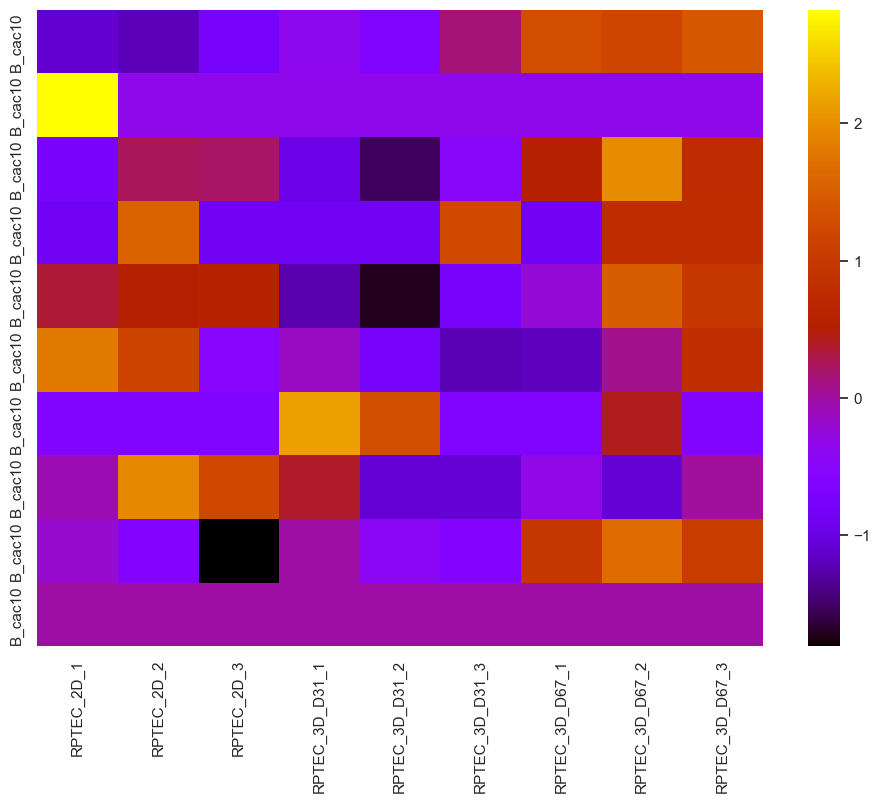

In [25]:
import scipy.stats as st
zscr=st.zscore(logv)
    
zscr=pd.DataFrame(zscr)
new=zscr.T
#new['symbol']=gene_name
zscr=new.fillna(0)
#zscr['symbol']=gene_name
zscr=zscr.values
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(zscr[0:10],xticklabels=data.columns[2:14], yticklabels=genename[0:10],annot=False,cmap='gnuplot')

In [27]:
#null hypothesis testing
vec1=logv[0:6]

In [28]:
#control
vec1

array([[4.61790845, 0.13506626, 0.13506626, ..., 0.        , 0.        ,
        0.25856293],
       [4.56337843, 0.        , 0.31237094, ..., 0.        , 0.11180889,
        0.        ],
       [4.75381902, 0.        , 0.3046433 , ..., 0.        , 0.        ,
        0.        ],
       [4.932949  , 0.        , 0.10062994, ..., 0.        , 0.        ,
        0.10062994],
       [4.83031024, 0.        , 0.        , ..., 0.        , 0.        ,
        0.13538222],
       [5.18325494, 0.        , 0.1865311 , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
vec2=logv[7:12]


In [30]:
#tumor
vec2

array([[5.65260056, 0.        , 0.61637272, ..., 0.        , 0.        ,
        0.14613802],
       [5.75559648, 0.        , 0.40062508, ..., 0.        , 0.21417434,
        0.07498026]])

In [31]:
meanTumor=np.mean(vec1,axis=0)

In [32]:
meanTumor

array([4.81360335, 0.02251104, 0.17320692, ..., 0.        , 0.01863482,
       0.08242918])

In [33]:
meanControl=np.mean(vec2,axis=0)

In [34]:
meanControl

array([5.70409852, 0.        , 0.5084989 , ..., 0.        , 0.10708717,
       0.11055914])

In [35]:
from scipy.stats import ttest_ind

In [36]:
pvalue=ttest_ind(vec1,vec2).pvalue

In [37]:
pvalue

array([0.00195785, 0.60364506, 0.01784889, ...,        nan, 0.19644355,
       0.73598689])

In [38]:
log2FC=meanTumor-meanControl

In [39]:
log2FC

array([-0.89049517,  0.02251104, -0.33529198, ...,  0.        ,
       -0.08845236, -0.02812996])

In [40]:
result=np.stack((meanTumor,meanControl,log2FC,pvalue),axis=0)

In [41]:
result

array([[ 4.81360335e+00,  2.25110431e-02,  1.73206923e-01, ...,
         0.00000000e+00,  1.86348152e-02,  8.24291814e-02],
       [ 5.70409852e+00,  0.00000000e+00,  5.08498901e-01, ...,
         0.00000000e+00,  1.07087171e-01,  1.10559139e-01],
       [-8.90495172e-01,  2.25110431e-02, -3.35291978e-01, ...,
         0.00000000e+00, -8.84523562e-02, -2.81299579e-02],
       [ 1.95785247e-03,  6.03645057e-01,  1.78488927e-02, ...,
                    nan,  1.96443550e-01,  7.35986893e-01]])

In [42]:
r=pd.DataFrame(result)
r=r.T

In [43]:
r.columns=["meanTumor","meanControl","log2FC","pvalue"]

In [48]:
r

,meanTumor,meanControl,log2FC,pvalue
0,4.813603,5.704099,-0.890495,0.001958
1,0.022511,0.000000,0.022511,0.603645
2,0.173207,0.508499,-0.335292,0.017849
3,0.034681,0.074949,-0.040268,0.355308
4,2.195593,2.781856,-0.586263,0.076264
...,...,...,...,...
61855,1.937926,3.209090,-1.271164,0.049411
61856,0.000000,0.000000,0.000000,NaN
61857,0.000000,0.000000,0.000000,NaN
61858,0.018635,0.107087,-0.088452,0.196444


In [49]:
r['gene']=gene_name

In [50]:
#r["gene"] = r.gene.shift(-1)
col_1=r.pop('gene')
r.insert(0,'gene',col_1)

In [51]:
r

,gene,meanTumor,meanControl,log2FC,pvalue
0,ATAD3B,4.813603,5.704099,-0.890495,0.001958
1,AL590822.1,0.022511,0.000000,0.022511,0.603645
2,MTND1P23,0.173207,0.508499,-0.335292,0.017849
3,RPL7P7,0.034681,0.074949,-0.040268,0.355308
4,MTCO3P12,2.195593,2.781856,-0.586263,0.076264
...,...,...,...,...,...
61855,AC240274.1,1.937926,3.209090,-1.271164,0.049411
61856,U1,0.000000,0.000000,0.000000,NaN
61857,AC213203.1,0.000000,0.000000,0.000000,NaN
61858,AC213203.2,0.018635,0.107087,-0.088452,0.196444


In [52]:
r['pvalue']=r['pvalue'].fillna(1)

In [53]:
r

,gene,meanTumor,meanControl,log2FC,pvalue
0,ATAD3B,4.813603,5.704099,-0.890495,0.001958
1,AL590822.1,0.022511,0.000000,0.022511,0.603645
2,MTND1P23,0.173207,0.508499,-0.335292,0.017849
3,RPL7P7,0.034681,0.074949,-0.040268,0.355308
4,MTCO3P12,2.195593,2.781856,-0.586263,0.076264
...,...,...,...,...,...
61855,AC240274.1,1.937926,3.209090,-1.271164,0.049411
61856,U1,0.000000,0.000000,0.000000,1.000000
61857,AC213203.1,0.000000,0.000000,0.000000,1.000000
61858,AC213203.2,0.018635,0.107087,-0.088452,0.196444


In [54]:
pip install bioinfokit

     ---------------------------------------- 87.0/87.0 KB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 9.1/9.1 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 233.7/233.7 KB 3.5 MB/s eta 0:00:00
Using legacy 'setup.py install' for bioinfokit, since package 'wheel' is not installed.
Using legacy 'setup.py install' for adjustText, since package 'wheel' is not installed.
Using legacy 'setup.py install' for matplotlib-venn, since package 'wheel' is not installed.
  Running setup.py install for matplotlib-venn: started
  Running setup.py install for matplotlib-venn: finished with status 'done'
  Running setup.py install for adjustText: started
  Ru

You should consider upgrading via the 'C:\Users\premb\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [58]:
r.to_csv("DEG.csv",index=False)

In [55]:
#!pip install bioinfokit
from bioinfokit import analys, visuz

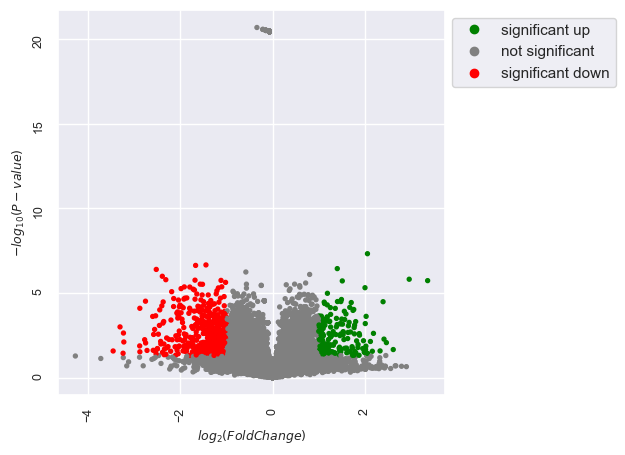

In [56]:
visuz.GeneExpression.volcano(r, lfc='log2FC', pv='pvalue',plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1),show=True)